# Plot performance from csv file

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def create_bar_plot_with_errorbars(data, errors, xticklabels=None, colors=None, legend_labels=None, show_legend = True, legend_anchor = (0.5, 1.35), ylim=None, xlabel='Groups', ylabel='Values', figsize=(10, 6)):
    """
    Create a bar plot with error bars.

    Parameters:
    - data: 2D list or numpy array with shape (n_groups, n_bars_per_group)
    - errors: 2D list or numpy array with shape (n_groups, n_bars_per_group)
    - xticklabels: List of labels for the x-axis ticks
    - colors: List of colors for each group of bars
    - legend_labels: List of labels for the legend
    - ylim: Tuple defining the y-axis limits (min, max)
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - figsize: Tuple defining the figure size (width, height)

    Returns:
    - fig, ax: Matplotlib figure and axis objects
    """
    n_groups, n_bars_per_group = data.shape
    bar_width = 0.8 / n_bars_per_group
    index = np.arange(n_groups)

    fig, ax = plt.subplots(figsize=figsize)


    if colors is None:
        colors = plt.cm.tab10(np.linspace(0, 1, n_bars_per_group))
    if legend_labels is None:
        legend_labels = [f'Model {i+1}' for i in range(n_bars_per_group)]
        
    for i in range(n_bars_per_group):
        ax.bar(index + i * bar_width, data[:, i], bar_width, yerr=errors[:, i], label=legend_labels[i], color=colors[i])
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.set_xticks(index + bar_width * (n_bars_per_group - 1) / 2)
    if xticklabels is not None:
        ax.set_xticklabels(xticklabels, rotation = 60)
    if show_legend: 
        ax.legend(loc='upper center', bbox_to_anchor=legend_anchor, ncol=n_bars_per_group//4 +1)

    if ylim:
        ax.set_ylim(ylim)

    # Remove the top and right frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    return fig, ax



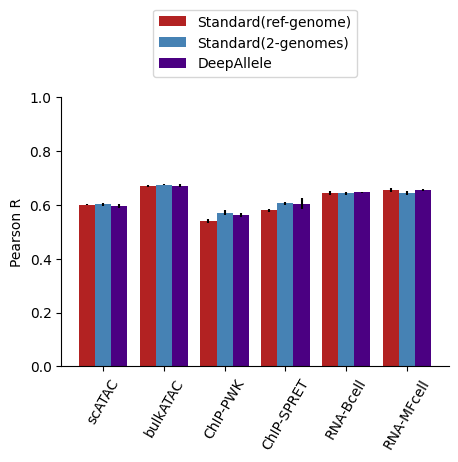

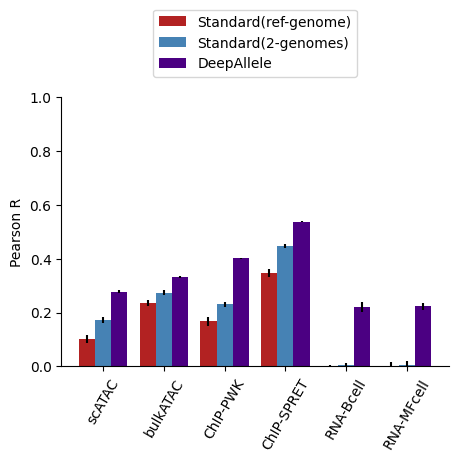

In [ ]:
import pandas as pd
df = pd.read_csv('merged_correlation_results.csv')

# Combine 'modality' and 'Dataset' into a new column 'modality-Dataset'
df['modality-Dataset'] = df['modality'] + '-' + df['Dataset']

# Group by 'modality-Dataset' and 'Model_Type' and compute the mean and standard deviation for 'count_A', 'count_B', and 'ratio'
mean_df = df.groupby(['modality-Dataset', 'Model_Type'])[['count_A', 'count_B', 'ratio']].mean().reset_index()
std_df = df.groupby(['modality-Dataset', 'Model_Type'])[['count_A', 'count_B', 'ratio']].std().reset_index()

# Merge the mean and standard deviation dataframes
result_df = mean_df.merge(std_df, on=['modality-Dataset', 'Model_Type'], suffixes=('_mean', '_std'))

# Filter out rows where Model_Type is 'DeepAllele(Two-head)'
result_df = result_df[result_df['Model_Type'] != 'DeepAllele(Two-head)']

# Replace 'modality-Dataset' values with more readable names
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('atac-sc', 'scATAC')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('atac-sum', 'bulkATAC')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('chip-PWK', 'ChIP-PWK')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('chip-SPRET', 'ChIP-SPRET')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('rna-MF_PC_IL4', 'RNA-MFcell')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('rna-B_Fo_Sp_IL4', 'RNA-Bcell')

result_df['Model_Type'] = result_df['Model_Type'].replace('SingleHead_twoGenomes', 'Standard(2-genomes)')
result_df['Model_Type'] = result_df['Model_Type'].replace('SingleHead_refGenome', 'Standard(ref-genome)')


# Prepare data for plotting
xticklabels = result_df['modality-Dataset'].unique()
model_types = result_df['Model_Type'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(model_types)+1))
colors = ['firebrick', 'steelblue', 'indigo']
# Compute the mean of count_A_mean and count_B_mean and replace with count_mean
result_df['count_mean'] = result_df[['count_A_mean', 'count_B_mean']].mean(axis=1)
result_df['count_std'] = result_df[['count_A_std', 'count_B_std']].mean(axis=1)

# Extract data for plotting
data_counts = []
data_ratios = []
errors_counts = []
errors_ratios = []
for model_type in model_types:
    model_data = result_df[result_df['Model_Type'] == model_type]
    data_counts.append(model_data['count_mean'].values)
    errors_counts.append(model_data['count_std'].values)
    data_ratios.append(model_data['ratio_mean'].values)
    errors_ratios.append(model_data['ratio_std'].values)

data_counts = np.array(data_counts).transpose()
errors_counts = np.array(errors_counts).transpose()
data_ratios = np.array(data_ratios).transpose()
errors_ratios = np.array(errors_ratios).transpose()

model_types = model_types[[1,2,0]]
data_counts = data_counts[:, [1,2,0]]
data_ratios = data_ratios[:, [1,2,0]]
errors_counts = errors_counts[:, [1,2,0]]
errors_ratios = errors_ratios[:, [1,2,0]]

# Plot the data
fig1, ax1 = create_bar_plot_with_errorbars(data_counts, errors_counts, xticklabels, colors, model_types, ylim=[0,1], xlabel = None, ylabel='Pearson R', figsize=(5, 3.5), show_legend = True)
fig2, ax2 = create_bar_plot_with_errorbars(data_ratios, errors_ratios, xticklabels, colors, model_types, ylim=[0,1], xlabel = None, ylabel='Pearson R', figsize=(5, 3.5), show_legend = True)
fig1.savefig('count_mean.png', bbox_inches='tight', dpi=300)
fig2.savefig('ratio_mean.png', bbox_inches='tight', dpi = 300)


['DeepAllele' 'Standard(ref-genome)' 'Standard(2-genomes)']
['DeepAllele' 'Standard(ref-genome)' 'Standard(2-genomes)']


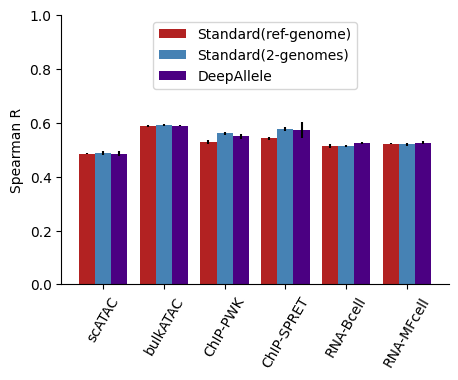

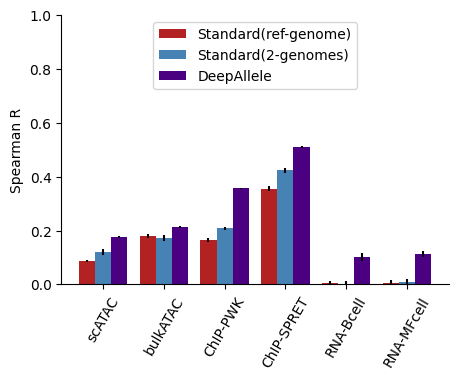

In [19]:
import pandas as pd 
df = pd.read_csv('merged_correlation_pearson_spearman_results.csv')

# Combine 'modality' and 'Dataset' into a new column 'modality-Dataset'
df['modality-Dataset'] = df['modality'] + '-' + df['Dataset']

# Group by 'modality-Dataset' and 'Model_Type' and compute the mean and standard deviation for 'count_A', 'count_B', and 'ratio'
mean_df = df.groupby(['modality-Dataset', 'Model_Type'])[['spearman_count_A', 'spearman_count_B', 'spearman_ratio']].mean().reset_index()
std_df = df.groupby(['modality-Dataset', 'Model_Type'])[['spearman_count_A', 'spearman_count_B', 'spearman_ratio']].std().reset_index()

# Merge the mean and standard deviation dataframes
result_df = mean_df.merge(std_df, on=['modality-Dataset', 'Model_Type'], suffixes=('_mean', '_std'))

# Filter out rows where Model_Type is 'DeepAllele(Two-head)'
result_df['Model_Type'] = result_df['Model_Type'].replace('DeepAllele(Two-head)', 'DeepAllele(direct-ratio)')

# Replace 'modality-Dataset' values with more readable names
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('atac-sc', 'scATAC')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('atac-sum', 'bulkATAC')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('chip-PWK', 'ChIP-PWK')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('chip-SPRET', 'ChIP-SPRET')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('rna-MF_PC_IL4', 'RNA-MFcell')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('rna-B_Fo_Sp_IL4', 'RNA-Bcell')

result_df['Model_Type'] = result_df['Model_Type'].replace('SingleHead_twoGenomes', 'Standard(2-genomes)')
result_df['Model_Type'] = result_df['Model_Type'].replace('SingleHead_refGenome', 'Standard(ref-genome)')


# Prepare data for plotting
xticklabels = result_df['modality-Dataset'].unique()
model_types = result_df['Model_Type'].unique()
print(model_types)
colors = plt.cm.tab10(np.linspace(0, 1, len(model_types)+1))
colors = ['firebrick', 'steelblue',  'indigo']
# Compute the mean of count_A_mean and count_B_mean and replace with count_mean
result_df['count_mean'] = result_df[['spearman_count_A_mean', 'spearman_count_B_mean']].mean(axis=1)
result_df['count_std'] = result_df[['spearman_count_A_std', 'spearman_count_B_std']].mean(axis=1)

# Extract data for plotting
data_counts = []
data_ratios = []
errors_counts = []
errors_ratios = []
for model_type in model_types:
    model_data = result_df[result_df['Model_Type'] == model_type]
    data_counts.append(model_data['count_mean'].values)
    errors_counts.append(model_data['count_std'].values)
    data_ratios.append(model_data['spearman_ratio_mean'].values)
    errors_ratios.append(model_data['spearman_ratio_std'].values)

data_counts = np.array(data_counts).transpose()
errors_counts = np.array(errors_counts).transpose()
data_ratios = np.array(data_ratios).transpose()
errors_ratios = np.array(errors_ratios).transpose()

print(model_types)
model_types = model_types[[1,2,0]]
data_counts = data_counts[:, [1,2,0]]
data_ratios = data_ratios[:, [1,2,0]]
errors_counts = errors_counts[:, [1,2,0]]
errors_ratios = errors_ratios[:, [1,2,0]]

# Plot the data
fig1, ax1 = create_bar_plot_with_errorbars(data_counts, errors_counts, xticklabels, colors, model_types, ylim=[0,1], legend_anchor = (0.5,1.), xlabel = None, ylabel='Spearman R', figsize=(5, 3.5), show_legend = True)
fig2, ax2 = create_bar_plot_with_errorbars(data_ratios, errors_ratios, xticklabels, colors, model_types, ylim=[0,1], legend_anchor = (0.5,1.), xlabel = None, ylabel='Spearman R', figsize=(5, 3.5), show_legend = True)
fig1.savefig('spearman_count_mean.png', bbox_inches='tight', dpi=300)
fig2.savefig('spearman_ratio_mean.png', bbox_inches='tight', dpi = 300)

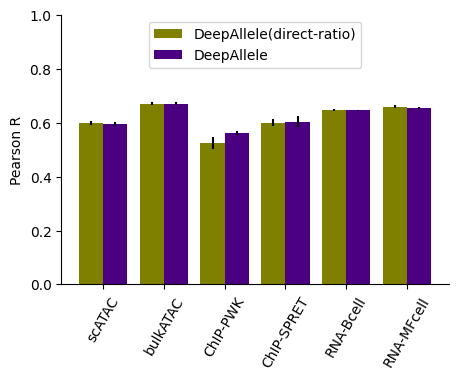

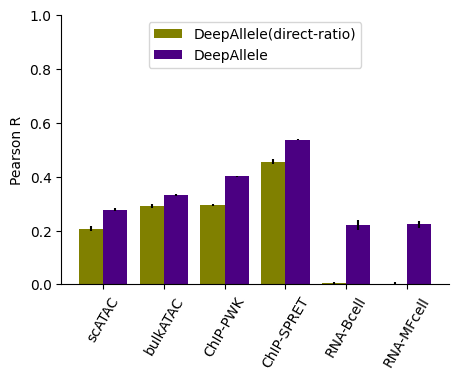

In [14]:
import pandas as pd
df = pd.read_csv('merged_correlation_results.csv')

# Combine 'modality' and 'Dataset' into a new column 'modality-Dataset'
df['modality-Dataset'] = df['modality'] + '-' + df['Dataset']

# Group by 'modality-Dataset' and 'Model_Type' and compute the mean and standard deviation for 'count_A', 'count_B', and 'ratio'
mean_df = df.groupby(['modality-Dataset', 'Model_Type'])[['count_A', 'count_B', 'ratio']].mean().reset_index()
std_df = df.groupby(['modality-Dataset', 'Model_Type'])[['count_A', 'count_B', 'ratio']].std().reset_index()

# Merge the mean and standard deviation dataframes
result_df = mean_df.merge(std_df, on=['modality-Dataset', 'Model_Type'], suffixes=('_mean', '_std'))

# Filter out rows where Model_Type is 'DeepAllele(Two-head)'
result_df = result_df[result_df['Model_Type'].isin(['DeepAllele(Two-head)', 'DeepAllele'])]

# Replace 'modality-Dataset' values with more readable names
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('atac-sc', 'scATAC')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('atac-sum', 'bulkATAC')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('chip-PWK', 'ChIP-PWK')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('chip-SPRET', 'ChIP-SPRET')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('rna-MF_PC_IL4', 'RNA-MFcell')
result_df['modality-Dataset'] = result_df['modality-Dataset'].replace('rna-B_Fo_Sp_IL4', 'RNA-Bcell')

result_df['Model_Type'] = result_df['Model_Type'].replace('DeepAllele(Two-head)', 'DeepAllele(direct-ratio)')

# Prepare data for plotting
xticklabels = result_df['modality-Dataset'].unique()
model_types = result_df['Model_Type'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(model_types)+1))
colors = ['olive', 'indigo']
# Compute the mean of count_A_mean and count_B_mean and replace with count_mean
result_df['count_mean'] = result_df[['count_A_mean', 'count_B_mean']].mean(axis=1)
result_df['count_std'] = result_df[['count_A_std', 'count_B_std']].mean(axis=1)

# Extract data for plotting
data_counts = []
data_ratios = []
errors_counts = []
errors_ratios = []
for model_type in model_types:
    model_data = result_df[result_df['Model_Type'] == model_type]
    data_counts.append(model_data['count_mean'].values)
    errors_counts.append(model_data['count_std'].values)
    data_ratios.append(model_data['ratio_mean'].values)
    errors_ratios.append(model_data['ratio_std'].values)

data_counts = np.array(data_counts).transpose()
errors_counts = np.array(errors_counts).transpose()
data_ratios = np.array(data_ratios).transpose()
errors_ratios = np.array(errors_ratios).transpose()


model_types = model_types[[1,0]]
data_counts = data_counts[:, [1,0]]
data_ratios = data_ratios[:, [1,0]]
errors_counts = errors_counts[:, [1,0]]
errors_ratios = errors_ratios[:, [1,0]]


# Plot the data
fig1, ax1 = create_bar_plot_with_errorbars(data_counts, errors_counts, xticklabels, colors, model_types, ylim=[0,1],legend_anchor = (0.5,1.),  xlabel = None, ylabel='Pearson R', figsize=(5, 3.5), show_legend = True)
fig2, ax2 = create_bar_plot_with_errorbars(data_ratios, errors_ratios, xticklabels, colors, model_types, ylim=[0,1],legend_anchor = (0.5,1.),  xlabel = None, ylabel='Pearson R', figsize=(5, 3.5), show_legend = True)
fig1.savefig('sup_count_mean.png', bbox_inches='tight', dpi=300)
fig2.savefig('sup_ratio_mean.png', bbox_inches='tight', dpi = 300)

['DeepAllele' 'Standard(2-genomes)' 'Standard(ref-genome)']


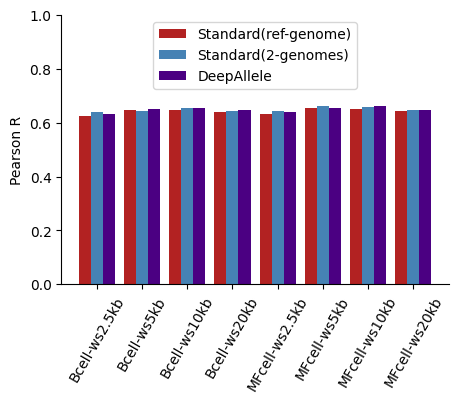

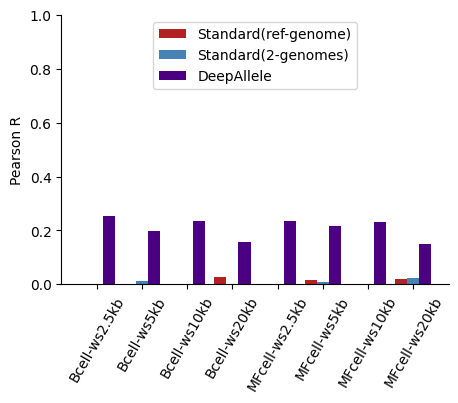

In [20]:
import pandas as pd
import sys  

df = pd.read_csv('window_size_vs_pearson_rna.csv')

# Define the format_float function
def format_float(value):
    if value % 1 == 0:  # Check if the float has no decimal part
        return str(int(value))  # Convert to an integer-like string
    else:
        return f"{value:.1f}"  # Format with one decimal place

df['batch_id'] = df['batch_id'].replace('B_Fo_Sp_IL4', 'Bcell')
df['batch_id'] = df['batch_id'].replace('MF_PC_IL4', 'MFcell')

# Apply the function to the 'window_size' column
df['formatted_window_size'] = df['window_size'].apply(lambda x: format_float(x / 1000))

# Combine 'batch_id' and 'formatted_window_size' into a new column 'modality-Dataset'
df['modality-Dataset'] = df['batch_id'] + '-ws' + df['formatted_window_size'] + 'kb'

# Group by 'modality-Dataset' and 'Model_Type' and compute the mean and standard deviation for 'count_A', 'count_B', and 'ratio'
mean_df = df.groupby(['modality-Dataset', 'model_type'])[['val_count1_corr', 'val_count2_corr', 'val_ratio_corr']].mean().reset_index()
std_df = df.groupby(['modality-Dataset', 'model_type'])[['val_count1_corr', 'val_count2_corr', 'val_ratio_corr']].std().reset_index()

# Merge the mean and standard deviation dataframes
result_df = mean_df.merge(std_df, on=['modality-Dataset', 'model_type'], suffixes=('_mean', '_std'))

# Replace 'model_type' values with more readable names
result_df['model_type'] = result_df['model_type'].replace('multi_ComputedRatio', 'Standard(2-genomes)')
result_df['model_type'] = result_df['model_type'].replace('multi', 'DeepAllele')
result_df['model_type'] = result_df['model_type'].replace('single', 'Standard(ref-genome)')


# Prepare data for plotting
xticklabels = result_df['modality-Dataset'].unique()
model_types = result_df['model_type'].unique()
print(model_types)
colors = plt.cm.tab10(np.linspace(0, 1, len(model_types)+1))
colors = ['firebrick', 'steelblue',  'indigo']
# Compute the mean of count_A_mean and count_B_mean and replace with count_mean
result_df['count_mean'] = result_df[['val_count1_corr_mean', 'val_count2_corr_mean']].mean(axis=1)
result_df['count_std'] = result_df[['val_count1_corr_std', 'val_count2_corr_std']].mean(axis=1)

# Extract data for plotting
data_counts = []
data_ratios = []
errors_counts = []
errors_ratios = []
for model_type in model_types:
    model_data = result_df[result_df['model_type'] == model_type]
    data_counts.append(model_data['count_mean'].values)
    errors_counts.append(model_data['count_std'].values)
    data_ratios.append(model_data['val_ratio_corr_mean'].values)
    errors_ratios.append(model_data['val_ratio_corr_std'].values)

data_counts = np.array(data_counts).transpose()
errors_counts = np.array(errors_counts).transpose()
data_ratios = np.array(data_ratios).transpose()
errors_ratios = np.array(errors_ratios).transpose()

model_types = model_types[[2,1,0]]
data_counts = data_counts[:, [2,1,0]]
data_ratios = data_ratios[:, [2,1,0]]
errors_counts = errors_counts[:, [2,1,0]]
errors_ratios = errors_ratios[:, [2,1,0]]

xticklabels = xticklabels[[1,3,0,2,5,7,4,6]]
data_counts = data_counts[[1,3,0,2,5,7,4,6]]
data_ratios = data_ratios[[1,3,0,2,5,7,4,6]]
errors_counts = errors_counts[[1,3,0,2,5,7,4,6]]
errors_ratios = errors_ratios[[1,3,0,2,5,7,4,6]]

# Plot the data
fig1, ax1 = create_bar_plot_with_errorbars(data_counts, errors_counts, xticklabels, colors, model_types, ylim=[0,1], legend_anchor = (0.5,1.), xlabel = None, ylabel='Pearson R', figsize=(5, 3.5), show_legend = True)
fig2, ax2 = create_bar_plot_with_errorbars(data_ratios, errors_ratios, xticklabels, colors, model_types, ylim=[0,1], legend_anchor = (0.5,1.), xlabel = None, ylabel='Pearson R', figsize=(5, 3.5), show_legend = True)
fig1.savefig('lengthRNA_count_mean.png', bbox_inches='tight', dpi=400)
fig2.savefig('lengthRNA_ratio_mean.png', bbox_inches='tight', dpi = 400)